Remaining:
    1. In chart text like names in category, skew number, % in hist

## Introduction

EDA(Exploratory Data Analysis) is done to understand the dataset and acknowledging oneself with data anamolies and its weaknesses before performing predictive and prescriptive analysis on it. This project is dedicated to perform EDA on an e-commerce dataset.

**Domain: E-Commerce**
With every passing minute, the world is getting busier. People prefer to purchase products online rather than wasting time in long queues. In Canada, sales from e-commerce was 32,442 million USD in 2021 and is estimated to be 40,352 million USD in 2025. With such huge online demands, this analysis becomes important to understand how customers, sellers relate with the online products and how conventional businesses can shift its reliance from offline to online mode of conduct.

This dataset is sourced from a SuperStore in Canada.

### Problem Definition

The aim of this project is to analyze the sales data of a superstore in CANADA to draw relevant conclusions and estimations around sales, consumer choices and market demands.


### Data Source 

https://github.com/curran/data/blob/gh-pages/superstoreSales/superstoreSales.csv

#### Code Start Time

In [1]:
from datetime import datetime

start = datetime.now()

current_time = start.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 01:58:02


### Importing Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy import stats
from urllib import request

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Version
print("Pandas : ", pd.__version__)
print("Seaborn : ", sns.__version__)
print("numpy : ", np.__version__)
print("urllib : ", request.__version__)

Pandas :  1.3.4
Seaborn :  0.11.2
numpy :  1.20.3
urllib :  3.9


### Importing Dataset: 

In [4]:
def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
file_url = 'https://github.com/curran/data/blob/gh-pages/superstoreSales/superstoreSales.csv?raw=true'
file_name = 'superstoreSales.csv'

download_file(file_name, file_url)

sales=pd.read_csv('superstoreSales.csv', encoding="Windows-1252")

## Data Exploration

### Data Description



1. **Row ID**: ID that uniquely identifies each row.
2. **Order ID** : ID that uniquely identifies each purchase.
3. **Order Date** : Date when each order was made/placed.
4. **Order Priority** : Has multiple levels, defines the urgency of the order being completed. 
5. **Order Quantity** : Quantity each item was ordered. 
6. **Sales** : Total billing Amount each customer paid.
7. **Discount** : Deduction from original price of an item
8. **Ship Mode** : The mode through which the item will be shipped.
9. **Profit** : The financial gain made by the store, (difference between amount earned and amount spent in buying,                             operating, or producing something.
10. **Unit Price** :The price of certain number of units of an item by the number of units to find the unit price of that                           item.
11. **Shipping Cost** : The cost of postage and related transportation to get the package from the shipping carrier to the                             end consumer.
12. **Customer Name** : Name of the Customer placing the order
13. **Province** : Name of Provinces in Canada
14. **Region** : Name of 5 major Regions : Atlantic, Central Canada, Prairie, West Coast, North
15. **Customer Segment** : Customers divided into groups based on common characteristics so companies can market to each                                  group effectively and appropriately.
16. **Product Category** : A group of products that offer similar benefits can be referred to as product categories.                                      Products from a same product category will have similar physical features and will offer similar                                benefits.
17. **Product Sub-category** : A subdivision of Product Categories.
18. **Product Name** : Name of the product bought by Customer
19. **Product Container** : Size of box used to ship product to Customer.
20. **Product Base Margin** : Amount the product sells for above the cost of manufacturing the product.
21. **Ship Date** : Date the product is finally shipped to be transported to the Customer. 
   

In [5]:
sales.shape

(8399, 21)

The data contains 
1. **8398** data entries 
2. **21** columns (features)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

Info Inference:

1. Product base margin has some null values.
2. Categorical Values : **12**
3. Numerical Values : **9**

In [7]:
 sales.describe()

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,0.512513
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,0.135589
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.350000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,0.590000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


### Column Renaming

In [8]:
sales.rename(columns = {'Profit':'profit', 
                              'Product Base Margin':'product_base_margin',
                              'Shipping Cost':'shipping_cost',
                               'Unit Price':'unit_price',
                              'Row ID' : 'row_id',
                              'Order ID':'order_id',
                              'Order Date':'order_date',
                              'Order Priority': 'order_priority',
                              'Order Quantity':'order_quantity',
                              'Sales':'sales',
                              'Discount':'discounts',
                              'Ship Mode':'ship_mode',
                              'Customer Name':'customer_name',
                              'Province':'province',
                              'Region':'region',
                              'Customer Segment':'customer_segment',
                              'Product Category':'product_category',
                              'Product Sub-Category':'product_sub_category',
                              'Product Name':'product_name',
                              'Product Container' : 'product_container',
                              'Ship Date':'ship_date' }, inplace = True)

In [9]:
sales.columns

Index(['row_id', 'order_id', 'order_date', 'order_priority', 'order_quantity',
       'sales', 'discounts', 'ship_mode', 'profit', 'unit_price',
       'shipping_cost', 'customer_name', 'province', 'region',
       'customer_segment', 'product_category', 'product_sub_category',
       'product_name', 'product_container', 'product_base_margin',
       'ship_date'],
      dtype='object')

For easier analysis, we are sorting the data according to order date

### Duplicates

In [10]:
duplicate_values = sales.duplicated()
print(duplicate_values.sum())

0


No duplicate values were found in the dataset.

### Sorting

In [11]:
sales_od = sales.sort_values('order_date')
sales_od.tail(5)

,row_id,order_id,order_date,order_priority,order_quantity,sales,discounts,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub_category,product_name,product_container,product_base_margin,ship_date
5871,4605,32804,9/9/2012,Medium,49,174.81,0.07,Regular Air,74.82,3.75,...,Lycoris Saunders,Saskachewan,Prarie,Corporate,Office Supplies,Labels,Avery 510,Small Box,0.37,9/10/2012
3371,2472,17959,9/9/2012,Medium,28,1201.68,0.01,Regular Air,146.80,40.99,...,Doug Jacobs,Quebec,Quebec,Home Office,Office Supplies,Paper,"White Dual Perf Computer Printout Paper, 2700 ...",Small Box,0.36,9/12/2012
5872,4606,32804,9/9/2012,Medium,20,89.51,0.02,Regular Air,-61.99,3.98,...,Lycoris Saunders,Saskachewan,Prarie,Corporate,Office Supplies,Binders and Binder Accessories,Ibico Presentation Index for Binding Systems,Small Box,0.38,9/11/2012
3372,2473,17959,9/9/2012,Medium,21,2784.57,0.05,Regular Air,847.06,136.98,...,Doug Jacobs,Quebec,Quebec,Home Office,Furniture,Office Furnishings,"3M Polarizing Task Lamp with Clamp Arm, Light ...",Large Box,0.59,9/12/2012
3925,1642,11874,9/9/2012,Medium,1,40.29,0.00,Regular Air,-82.13,30.42,...,Tracy Poddar,Ontario,Ontario,Corporate,Technology,Computer Peripherals,"Fellowes Internet Keyboard, Platinum",Small Box,0.74,9/11/2012


### Counting Null Values

In [12]:
sales_od.isnull().sum()

row_id                   0
order_id                 0
order_date               0
order_priority           0
order_quantity           0
sales                    0
discounts                0
ship_mode                0
profit                   0
unit_price               0
shipping_cost            0
customer_name            0
province                 0
region                   0
customer_segment         0
product_category         0
product_sub_category     0
product_name             0
product_container        0
product_base_margin     63
ship_date                0
dtype: int64

profit_base_margin has **63** null values that should be analyzed further.

### Analyzing Null Values

In [70]:
#Printing first 10 records to avoid mess
sales_od[sales_od['product_base_margin'].isnull()][:10]

,row_id,order_id,order_date,order_priority,order_quantity,sales,discounts,ship_mode,profit,unit_price,...,customer_segment,product_category,product_sub_category,product_name,product_container,product_base_margin,ship_date,month,day,year


In [14]:
ls_prname_null=sales_od[sales_od['product_base_margin']\
                        .isnull()]['product_name']\
                        .unique()

In [15]:
ls_prname_null

array(['Safco Industrial Wire Shelving',
       'SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black',
       'Safco Contoured Stacking Chairs',
       'SAFCO Mobile Desk Side File, Wire Frame',
       'SAFCO Folding Chair Trolley', 'SAFCO Arco Folding Chair',
       'SAFCO Optional Arm Kit for Workspace¨ Cribbage Stacking Chair',
       'SAFCO Commercial Wire Shelving, Black',
       'SAFCO Boltless Steel Shelving',
       'Safco Value Mate Steel Bookcase, Baked Enamel Finish on Steel, Black'],
      dtype=object)

In [16]:
# Checking if these products have profit_base_margin values other than null:

def check(ls_prname_null):
    for name in ls_prname_null:
        name_output= sales_od[sales_od['product_name']==name]
        return name_output[name_output.product_base_margin.notnull()]

In [17]:
check(ls_prname_null)

,row_id,order_id,order_date,order_priority,order_quantity,sales,discounts,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub_category,product_name,product_container,product_base_margin,ship_date


Profit base margin of these products is not known, which may imply that:
 1. The profit base margin of these products is not fixed (may be seasonal)
 2. During data collection, these values may not be recorded.


**Claim 1**: It appears that the missing Profit Base Margins are missing only for SAFCO Products. 

#### Sanity Check - 1 : Checking if OnlySAFCO Company has non-null Product Base Margin Values.

In [18]:
safco_data=sales_od[(sales_od['product_name'].str.lower().str.contains("safco"))]

In [19]:
safco_data[safco_data['product_base_margin'].notnull()]

,row_id,order_id,order_date,order_priority,order_quantity,sales,discounts,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub_category,product_name,product_container,product_base_margin,ship_date


 **Conclusion on Claim 1**:   
    
    All Safco company's products have missing profit base margin. 
    Possible Explanations for Missing Data:
        1. They might have chosen to not have reported the values.
        2. Error in Data Entry.

### Handling Null Values - Data Cleaning

In [20]:
sales_od['product_base_margin'].describe()

count    8336.000000
mean        0.512513
std         0.135589
min         0.350000
25%         0.380000
50%         0.520000
75%         0.590000
max         0.850000
Name: product_base_margin, dtype: float64

Mean  is around 51%, Median is around 52%.
According to market staticts, the profit margin on office furniture products is around 52%.
Thus, we have filled null values with 52% product base margin.

Information Reference:
    1. https://www.arcade.co/post/increasing-margin-in-furniture-retail

In [21]:
sales_od['product_base_margin']=sales_od['product_base_margin'].fillna(0.52)

In [22]:
sales_od[sales_od.product_base_margin.isnull()]

,row_id,order_id,order_date,order_priority,order_quantity,sales,discounts,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub_category,product_name,product_container,product_base_margin,ship_date


### Automated Labeling Plots

In [23]:
## Function for setting labels and title of plots
def auto_label(x='',y='',title='',sl=16,st=20):
    font_t = {'size':st, 'family':'serif'}
    font_l = {'size':sl, 'family':'serif'}
    plt.xlabel(x, fontdict=font_l)
    plt.ylabel(y, fontdict=font_l)
    plt.title(title, fontdict=font_t)

### Anamoly Detection

#### Unit Price

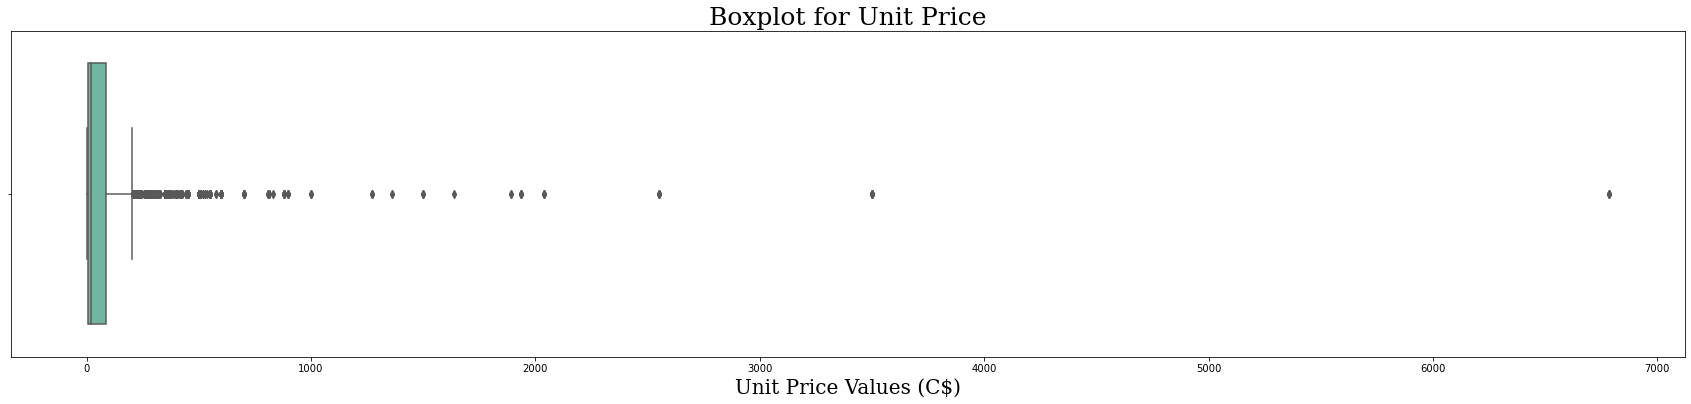

In [24]:
plt.figure(figsize=(30,6))
plot = sns.boxplot(x=sales_od['unit_price'], 
                   orient="h", 
                   palette="Set2")

auto_label(x='Unit Price Values (C$)',title='Boxplot for Unit Price', st=25, sl=20)

plt.show()

#### Profit

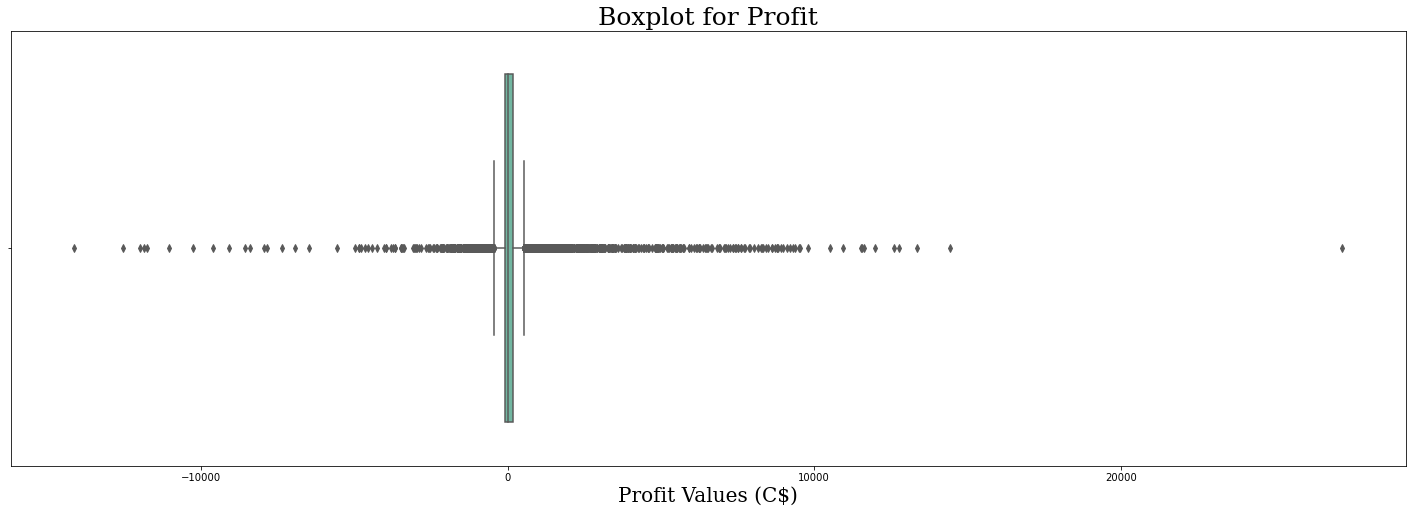

In [25]:
plt.figure(figsize=(25,8))
plot = sns.boxplot(x=sales_od['profit'],
                   orient="h", 
                   palette="Set2")

auto_label(x='Profit Values (C$)',title='Boxplot for Profit', st=25, sl=20)

plt.show()

#### Product Base Margin

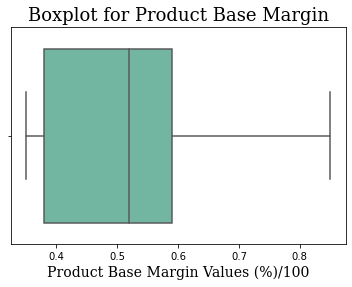

In [26]:
plot = sns.boxplot(x=sales_od['product_base_margin'], 
                   orient="h", 
                   palette="Set2")

auto_label(x='Product Base Margin Values (%)/100',title='Boxplot for Product Base Margin', st=18, sl=14)

plt.show()

#### Discounts

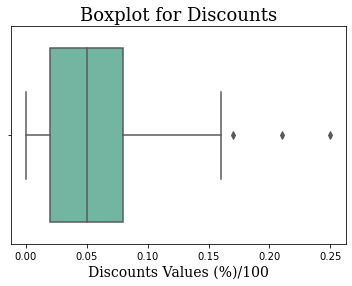

In [27]:
plot = sns.boxplot(x=sales_od['discounts'], 
                   orient="h", 
                   palette="Set2")

auto_label(x='Discounts Values (%)/100',title='Boxplot for Discounts', st=18, sl=14)

plt.show()

#### Sales

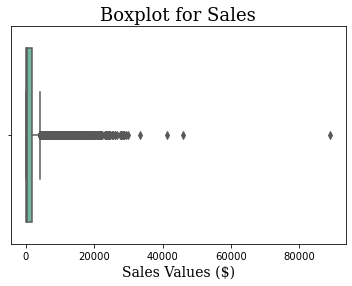

In [28]:
plot = sns.boxplot(x=sales_od['sales'], 
                   orient="h", 
                   palette="Set2")

auto_label(x='Sales Values ($)',title='Boxplot for Sales', st=18, sl=14)

plt.show()

#### Shipping Cost

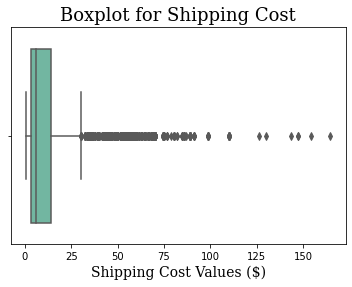

In [29]:
plot = sns.boxplot(x=sales_od['shipping_cost'], 
                   orient="h", 
                   palette="Set2")

auto_label(x='Shipping Cost Values ($)',title='Boxplot for Shipping Cost', st=18, sl=14)

plt.show()

#### Counting Outliers

In [30]:
Q1 = sales_od[['discounts','profit','sales','shipping_cost','unit_price']].quantile(0.25)
Q3 = sales_od[['discounts','profit','sales','shipping_cost','unit_price']].quantile(0.75)
IQR = Q3 - Q1
store=((sales_od[['discounts','profit','sales','shipping_cost','unit_price']] < (Q1 - 1.5 * IQR)) | (sales_od[['discounts','profit','sales','shipping_cost','unit_price']] > (Q3 + 1.5 * IQR))).sum()
print('                     %')
store*100/8398 

                     %


discounts         0.035723
profit           20.290545
sales            12.407716
shipping_cost    11.574184
unit_price       10.097642
dtype: float64

### Removing Outliers

In this use case, we are not sure how we will be using the dataset in the future. Hence it would be unwise to remove the outliers at this stage.

# Visualization

## Univariate Analysis 
### Categorical

### Province - Order Location

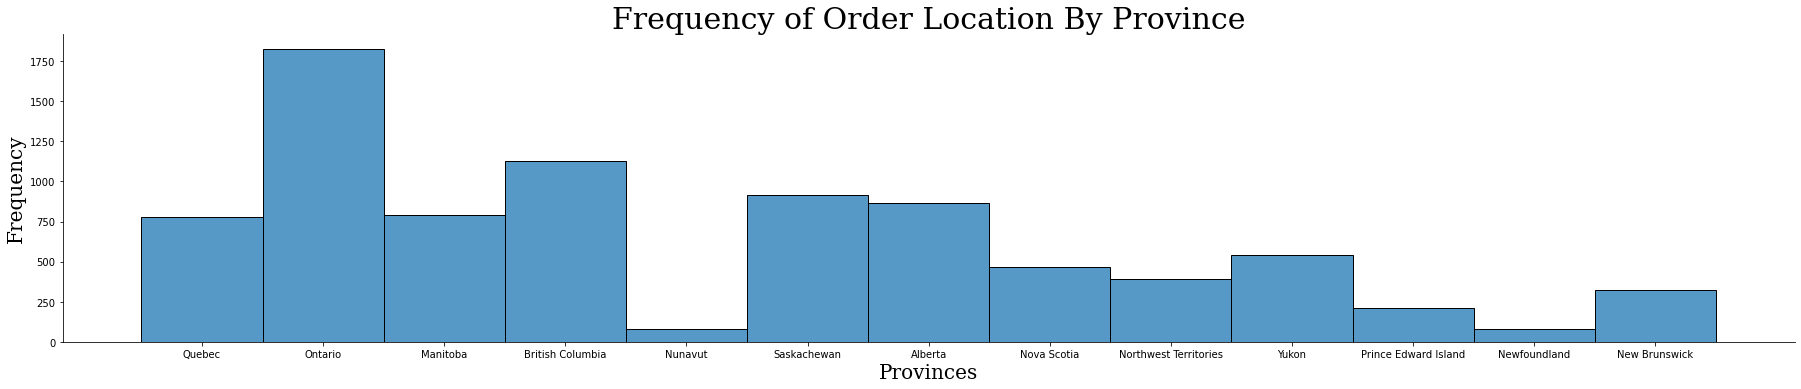

In [31]:
sns.displot(data=sales_od,
            x='province', 
            aspect=5)
auto_label("Provinces","Frequency","Frequency of Order Location By Province", st=30, sl=20)
plt.show()

This superstore is widely used in **Ontario Province.**

In [32]:
provinces = sales_od.groupby(by="province").count()['order_id']
print(provinces.keys)

<bound method Series.keys of province
Alberta                   865
British Columbia         1126
Manitoba                  793
New Brunswick             323
Newfoundland               82
Northwest Territories     394
Nova Scotia               464
Nunavut                    79
Ontario                  1826
Prince Edward Island      211
Quebec                    781
Saskachewan               913
Yukon                     542
Name: order_id, dtype: int64>


### Region - Order Location

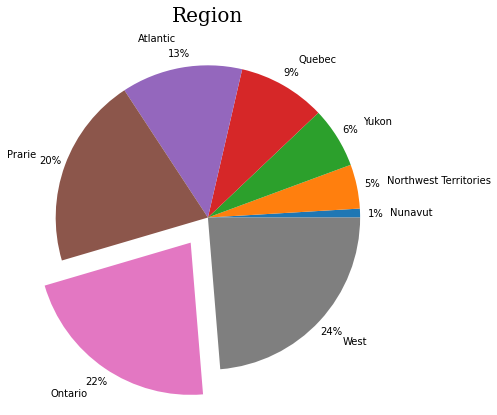

In [33]:
reg = sales_od.groupby('region').count()['order_id'].sort_values()
explode=(0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0)
reg.plot.pie(subplots=True, 
             figsize=(15, 7), 
             autopct='%1.0f%%',
             pctdistance=1.1, 
             labeldistance=1.2, 
             explode=explode)
plt.title('Region', fontdict={'size':20, 'family':'serif'})
plt.ylabel('')
plt.show()

#### Sanity Check 2

**Claim 2:** The region column has incorrect region values. 

    In Canada, there are actually 5 major regions with various provinces in each region: 
    
    1. Atlantic Provinces : New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland, Labrador. 
    2. Central Canada : Quebec, Ontario.
    3. Prairie Provinces : Manitoba, Saskatchewan, Alberta.
    4. West Coast : British Columbia.
    5. North : Nunavut , Northwest Territories, Yukon.
    
   Reference: https://www.worldatlas.com/articles/the-regions-of-canada.html
   
Therefore, according to this information Claim 2 is True and we move towards cleaning this field in the DataSet

### Region Column Correction - Data Cleaning

In [34]:
# Function to fix incorrect values in region column.
def fix_region(x):
    north = ['Nunavut' , 'Northwest Territories', 'Yukon']
    central = ['Quebec', 'Ontario']
    for i in range(len(x)):
        if x[i] in north:
            x[i]='North'
        elif x[i] in central:
            x[i]='Central Canada'
fix_region(sales_od['region'])

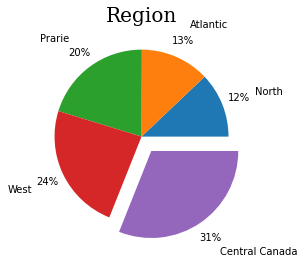

In [35]:
reg = sales_od.groupby('region').count()['order_id'].sort_values()

explode=(0.0,0.0,0.0,0.0,0.2)

reg.plot.pie(subplots=True, 
             figsize=(8, 4), 
             autopct='%1.0f%%',
             pctdistance=1.2, 
             labeldistance=1.4, 
             explode=explode)

plt.title('Region', fontdict={'size':20, 'family':'serif'})
plt.ylabel('')
plt.show()

### Demand

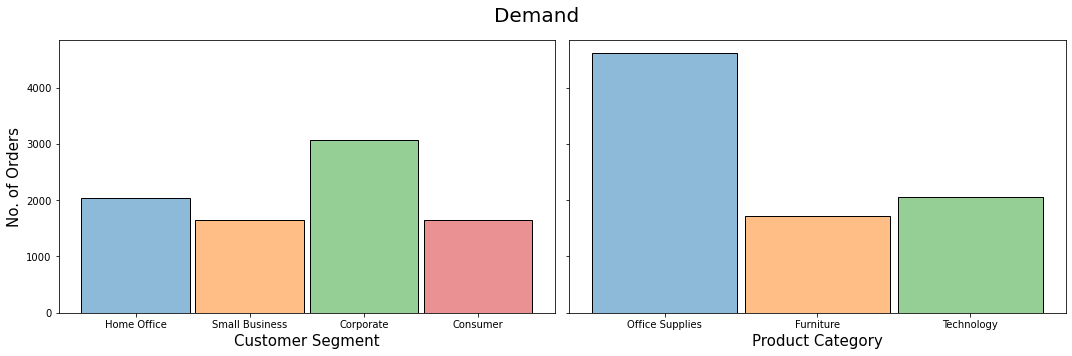

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Demand',size=20)

# Histogram Plot - Customer Segment
__=sns.histplot(ax=axes[0], 
                data=sales_od,
                x='customer_segment', 
                shrink=0.95,
                hue='customer_segment',
               legend=False)
__.set(xlabel='Customer Segment')
__.set(ylabel='No. of Orders')

# Histogram Plot - Product Category
_=sns.histplot(ax=axes[1], 
               data=sales_od, 
               x='product_category',
               shrink=0.95,
               hue='product_category',
               legend=False)
_.set(xlabel='Product Category', )

_.xaxis.get_label().set_fontsize(15)
__.xaxis.get_label().set_fontsize(15)
__.yaxis.get_label().set_fontsize(15)

plt.tight_layout()
plt.show()

### Shipment Method Details

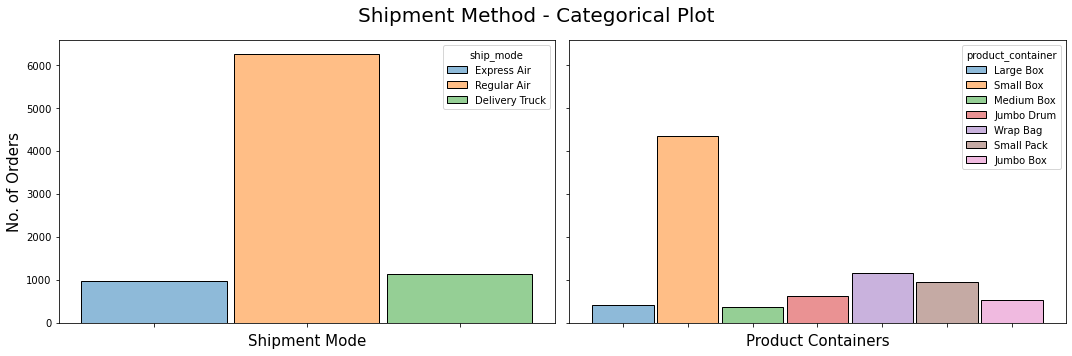

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Shipment Method - Categorical Plot', size=20)

# Histogram Plot - Shipment Mode
__=sns.histplot(ax=axes[0], 
                data=sales_od, 
                x='ship_mode', 
                shrink=0.95, 
                hue='ship_mode')
__.set(xticklabels=[],
       xlabel='Shipment Mode')
__.set(ylabel='No. of Orders')

# Histogram Plot - Product Container
_=sns.histplot(ax=axes[1], 
               data=sales_od, 
               x='product_container',
               shrink=0.95, 
               hue='product_container')
_.set(xticklabels=[],
      xlabel='Product Containers')

_.xaxis.get_label().set_fontsize(15)
__.xaxis.get_label().set_fontsize(15)
__.yaxis.get_label().set_fontsize(15)

plt.tight_layout()
plt.show()


### Order Priority

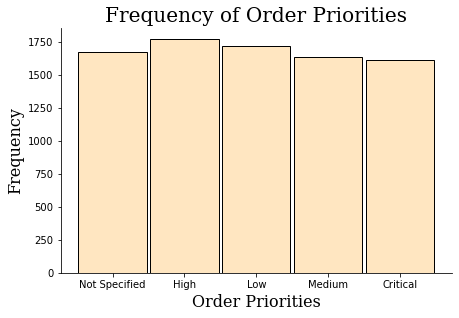

In [38]:
sns.displot(data=sales_od,
            x='order_priority', 
            aspect=2,
            shrink=0.95,
            color='navajowhite'
           )

auto_label("Order Priorities","Frequency","Frequency of Order Priorities")
plt.gcf().set_size_inches(6, 4)
plt.show()

## Bivariate Analysis

### Numerical Vs. Numerical

#### Correlation

In [39]:
corr = sales_od.corr(method = 'spearman')
## Change colors

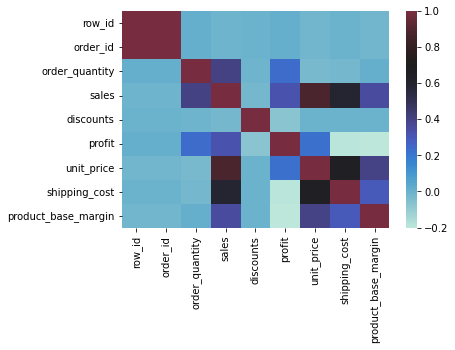

In [40]:
sns.heatmap(corr, center=0.7)
plt.show()

#### Scatter Plot

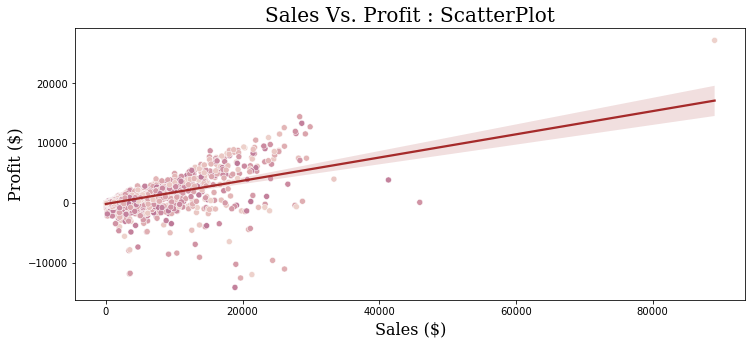

In [41]:
plt.figure(figsize=(12,5))
_=sns.regplot(data=sales_od, 
               x='sales', 
               y='profit',
               marker='',
               color='brown')

__=sns.scatterplot(data = sales_od , 
                x='sales', 
                y='profit', 
                hue='discounts',
                alpha=1,
                legend=False
                )


auto_label('Sales ($)','Profit ($)','Sales Vs. Profit : ScatterPlot')
plt.show()


### Categorical Vs. Numerical

#### Bar Plot

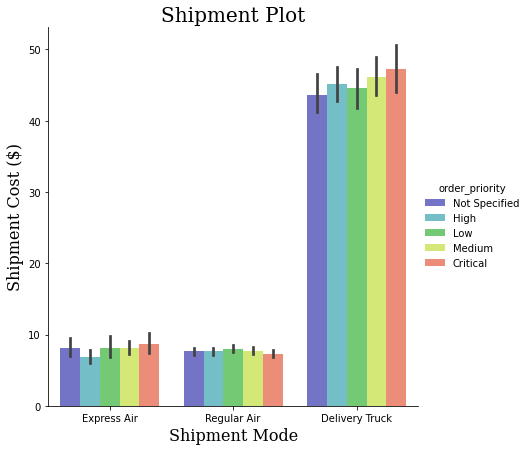

In [42]:
ship = sns.catplot(data=sales_od,
                   kind='bar',
                   x='ship_mode',
                   y='shipping_cost', 
                   hue='order_priority',
                   palette='nipy_spectral', 
                   alpha=.6, 
                   height=6 )
auto_label('Shipment Mode', 'Shipment Cost ($)', 'Shipment Plot')

### Two Categorical Variables

#### Grouped Bar Chart

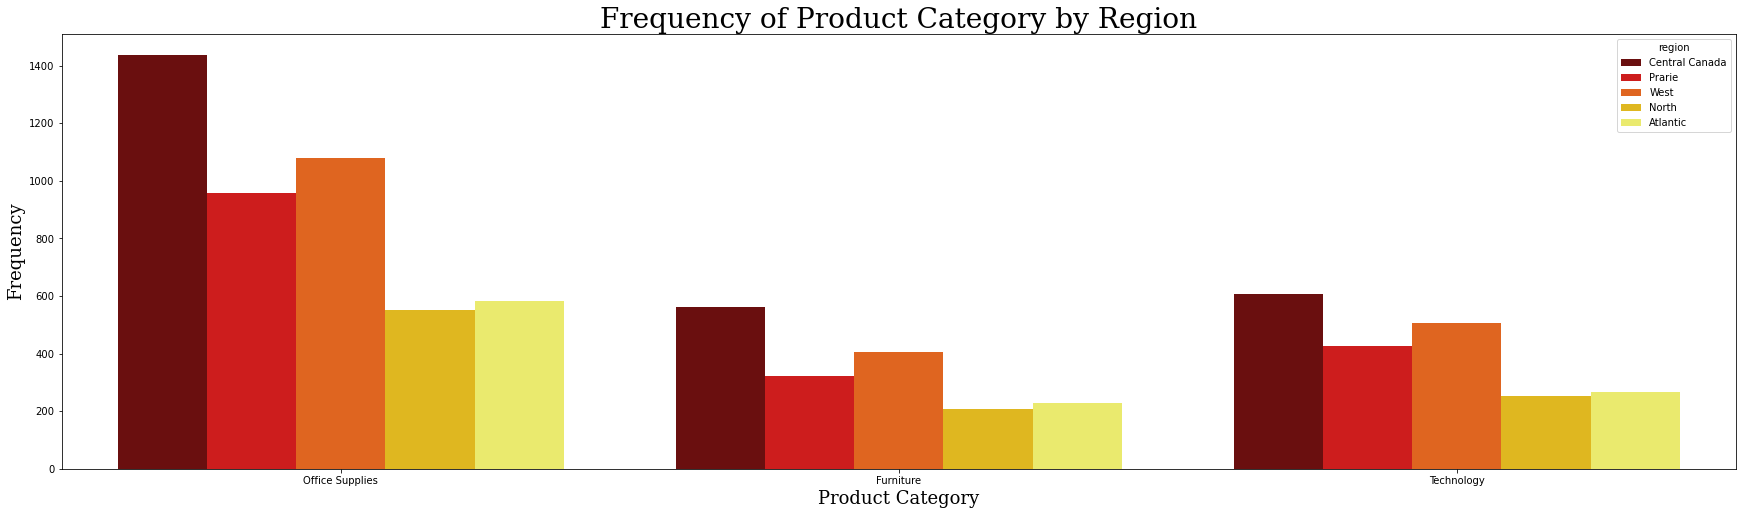

In [43]:
#Count of Sub-Category region wise
plt.figure(figsize=(30,8))
_=sns.countplot(x="product_category", hue="region",palette="hot", data=sales_od)

auto_label("Product Category","Frequency","Frequency of Product Category by Region",sl=18,st=28)
plt.show()

## Data Insights

#### Most Popular Product - Maximum times ordered product

In [44]:
sales_od.groupby('product_name')['order_quantity']\
        .sum()\
        .sort_values(ascending=False)[:3]

product_name
Global High-Back Leather Tilter, Burgundy      666
Bevis 36 x 72 Conference Tables                619
Wilson Jones Hanging View Binder, White, 1"    585
Name: order_quantity, dtype: int64

'Global High-Back Leather Tilter, Burgundy' is orders maximum times.

#### Most Costly Product in the dataset

In [45]:
sales_od['unit_price'].max()

6783.02

In [46]:
sales_od.drop_duplicates(subset='product_name')\
                        [sales_od['unit_price']==6783.02]\
                        [['product_name','unit_price']]

,product_name,unit_price
3512,Polycom ViewStationª ISDN Videoconferencing Unit,6783.02


#### Product with Highest/Lowest Sales 

In [47]:
grp_product = sales_od.groupby(by='product_name')
grp_product = grp_product['sales'].sum()
print("Product with Highest Sales in C$ : \n",grp_product[grp_product.values==grp_product.max()])
print("\nProduct with Lowest Sales in C$: \n",grp_product[grp_product.values==grp_product.min()])


Product with Highest Sales in C$ : 
 product_name
Global Troyª Executive Leather Low-Back Tilter    275941.52
Name: sales, dtype: float64

Product with Lowest Sales in C$: 
 product_name
Alliance Rubber Bands    14.85
Name: sales, dtype: float64


#### Purchases - Maximum Profit Making/No-Profit Making/Loss Making

In [48]:
# Draw a pie chart
count_profit_making=len(sales[sales_od['profit']>0])
count_loss_making=len(sales[sales_od['profit']<0])
count_noprofit_making=len(sales[sales_od['profit']==0])
print("Count of Profit Making Purchases : ", count_profit_making) 
print("Count of Loss Making Purcahses : ", count_loss_making)
print("Count of Neutral Purchases : " ,count_noprofit_making)

Count of Profit Making Purchases :  4135
Count of Loss Making Purcahses :  4264
Count of Neutral Purchases :  0


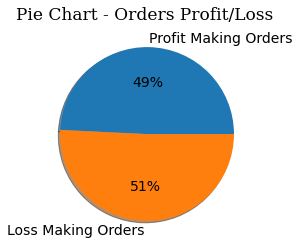

In [49]:
plt.pie([count_profit_making,count_loss_making], 
        labels = ['Profit Making Orders','Loss Making Orders'],
        textprops = {'color': 'Black','fontsize':14},
        shadow=True,
        autopct='%.0f%%')

auto_label(title='Pie Chart - Orders Profit/Loss ', st=17)
plt.show()

### Sales Trend

In [50]:
month=[]
day=[]
year=[]
for i in sales_od['order_date']:
    year.append(int(i[-4:]))
    day_temp = i[-7:-5]
    day_temp=day_temp.strip('/')
    day.append(int(day_temp))
    month_temp = i[0:2]
    month_temp=month_temp.strip('/')
    month.append(int(month_temp)) 
    
sales_od['month']=month
sales_od['day']=day
sales_od['year']=year
    

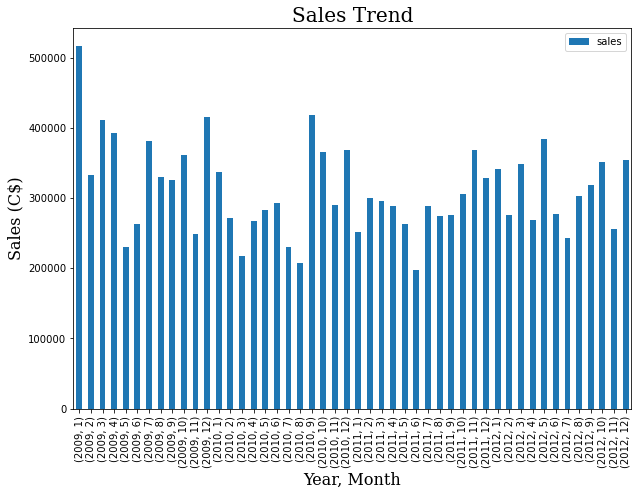

In [51]:
groupedby_ym = sales_od.groupby(by=['year','month'])\
                       .agg({'sales':'sum'})
groupedby_ym.plot(kind='bar', figsize=(10,7), legend=True)

auto_label('Year, Month','Sales (C$)', 'Sales Trend')
plt.xticks(rotation=90)
plt.show()

### Avg value of order in a month

In [52]:
groupby_month= sales_od.groupby(by='month').agg({'sales':'mean'})
lss=[]
for i in groupby_month.values.tolist():
    lss.append(i[0])

In [53]:
#2009
group_2009 = sales_od.groupby('year').get_group(2009)
monthly_avg_2009=group_2009.groupby('month')['sales'].mean()
monthly_avg_2009=monthly_avg_2009.values.tolist()

#2010
group_2010 = sales_od.groupby('year').get_group(2010)
monthly_avg_2010=group_2010.groupby('month')['sales'].mean()
monthly_avg_2010=monthly_avg_2010.values.tolist()

#2011
group_2011 = sales_od.groupby('year').get_group(2011)
monthly_avg_2011=group_2011.groupby('month')['sales'].mean()
monthly_avg_2011=monthly_avg_2011.values.tolist()

#2012
group_2012 = sales_od.groupby('year').get_group(2012)
monthly_avg_2012=group_2012.groupby('month')['sales'].mean()
monthly_avg_2012=monthly_avg_2012.values.tolist()


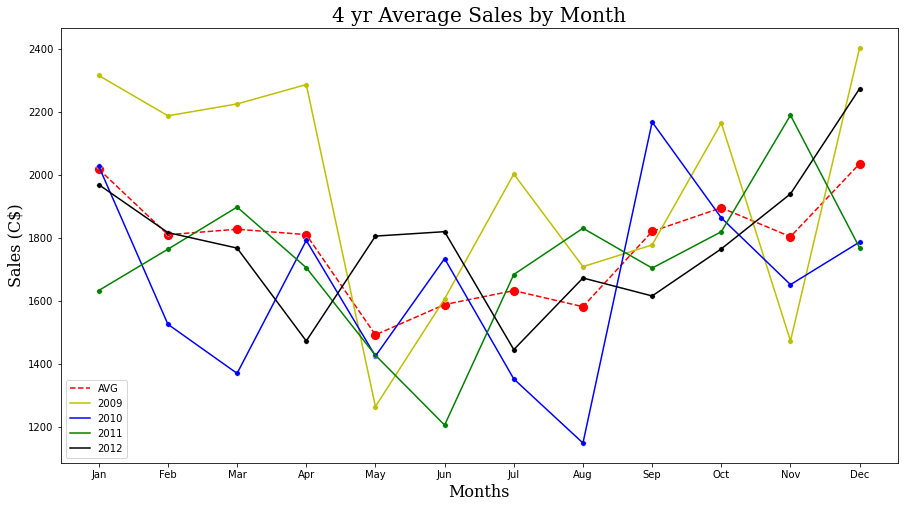

In [54]:
plt.figure(figsize=(15,8))
sns.scatterplot( x=list(groupby_month.index), 
                y=lss, 
                legend=False, 
                s=100, 
                color='r')

ax=sns.lineplot(x=list(groupby_month.index), y=lss,color='r')
ax.lines[0].set_linestyle("--")

#year 2009
sns.scatterplot( x=list(groupby_month.index), 
                 y=monthly_avg_2009, 
                 legend=False, s=30, 
                 color='y')
sns.lineplot(x=list(groupby_month.index), y=monthly_avg_2009, color='y')

#year 2010
sns.scatterplot( x=list(groupby_month.index), 
                 y=monthly_avg_2010, 
                 legend=False, s=30, 
                 color='b')
sns.lineplot(x=list(groupby_month.index), y=monthly_avg_2010, color='b')

#year 2011
sns.scatterplot( x=list(groupby_month.index), 
                 y=monthly_avg_2011, 
                 legend=False, s=30, 
                 color='g')
sns.lineplot(x=list(groupby_month.index), y=monthly_avg_2011, color='g')

#year 2012
sns.scatterplot( x=list(groupby_month.index), 
                 y=monthly_avg_2012, 
                 legend=False, s=30, 
                 color='k')
sns.lineplot(x=list(groupby_month.index), y=monthly_avg_2012, color='k')


plt.xticks(list(groupby_month.index), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep', 'Oct','Nov','Dec'])

plt.legend(['AVG','2009','2010','2011','2012'])
auto_label('Months','Sales (C$)', '4 yr Average Sales by Month')
plt.show()

### Avg Sales by Year

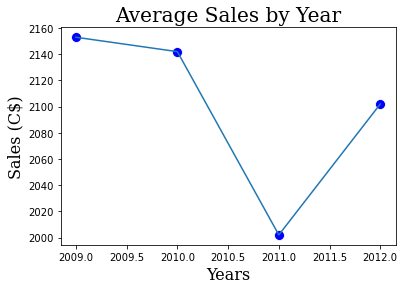

In [55]:
year_avg = sales_od.groupby('year')
yr=[]
avg_s=[]
for i,j in year_avg:
    yr.append(i)
    avg_s.append(j['order_id'].value_counts().sum())

sns.lineplot(x=yr, 
             y=avg_s)
sns.scatterplot(x=yr, 
                y=avg_s,
                legend=False, 
                s=100, 
                color='b')
auto_label('Years','Sales (C$)','Average Sales by Year')
plt.show()

### How fast orders are shipped?

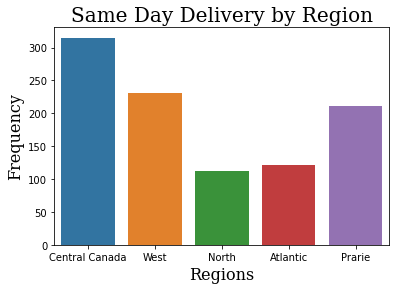

In [56]:
date_ship=[]
date_order=[]
for i in sales_od['ship_date']:
    date_ship.append(datetime.strptime((i[0:-4]+i[-2:]), '%m/%d/%y').date())

for j in sales_od['order_date']:
    date_order.append(datetime.strptime((j[0:-4]+j[-2:]), '%m/%d/%y').date())
    

delivery_period=[]
sameday_delivery_index=[]
for n in range(len(sales_od)):
    time_taken = date_ship[n] - date_order[n]
    if time_taken.days == 0:
        sameday_delivery_index.append(n)
    delivery_period.append(time_taken.days)

delivery = sales_od[['order_date','ship_date']].copy()
delivery['delivery_period']=delivery_period
# delivery[delivery['order_date']=='1/31/2012']
# sales_od.iloc[sameday_delivery_index]

q1 = sales_od.iloc[sameday_delivery_index]['region']
sns.countplot(q1)
auto_label('Regions','Frequency','Same Day Delivery by Region')
plt.show()

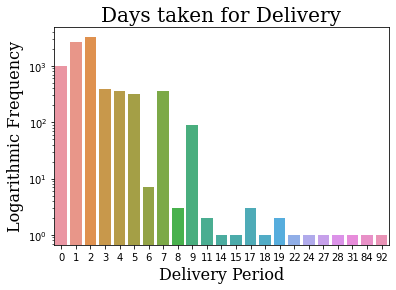

In [57]:
sns.countplot(delivery['delivery_period'])
plt.yscale('log')
auto_label('Delivery Period', 'Logarithmic Frequency', 'Days taken for Delivery')
plt.show()

### Designed Function to Study Customers 

In [58]:
def customer_analysis(data, customer_name, order_id, sales):
   
    print('---------------------------------------------------------------------------------------------------------------')
    print('                                              CUSTOMER ANALYSIS')
    print('---------------------------------------------------------------------------------------------------------------')
    #Query 1: Distinct Customers
    temp = data.groupby(by=[customer_name])[order_id]\
              .unique()
    
    print("1. Number of Distinct Customers : {} \n".format(temp.count()))
    print('-----') 
    #Query 2: Frequent Orderers
    ls_temp_values = list(temp.values)
    name_dis_orders =[]

    for i in range(len(ls_temp_values)):
        name_dis_orders.append((temp.index[i],len(ls_temp_values[i])))

    print("\n2. Top 10 Frequent Orderers :\n\n{} \n"\
          .format(sorted(name_dis_orders, \
                         key=lambda x : x[1],\
                         reverse=True)[:10]
                 )
         )
    print('-----') 
    
    #Query 3: Variety in Purchase
    q3 = sales_od.groupby(by=['customer_name'])['order_id']\
            .value_counts()\
            .sort_values(ascending=False)\
            [:10]
    print("\n3. Top 10 Orderers with most varied purcahse in single order : \n\n{} \n"\
         .format(q3))
    print('-----')
    
    #Query 4: 
    q4 = sales_od.groupby(by=['customer_name'])['order_id']\
                 .count()\
                 .sort_values(ascending=False)\
                 [:10]
    print("\n4. Top 10 customers with maximum number of products purchased : \n\n{} \n"\
         .format(q4))
    print('-----')
    
    #Query 5:
    ### 
    q5 = sales_od.groupby(by=['order_id'])['sales']\
                   .sum()\
                   .sort_values(ascending=False)[:10]
    print("\n5. Top 10 Max. Value Orders : \n\n{} \n"\
         .format(q5))
    print('------x------x-----------x------x-----------x------x-----------x------x-----------x------x-----------x------x-----')
    

In [59]:
customer_analysis(sales_od, 'customer_name', 'order_id', 'sales' )

---------------------------------------------------------------------------------------------------------------
                                              CUSTOMER ANALYSIS
---------------------------------------------------------------------------------------------------------------
1. Number of Distinct Customers : 795 

-----

2. Top 10 Frequent Orderers :

[('Darren Budd', 26), ('Brad Thomas', 24), ('Ed Braxton', 22), ("Jack O'Briant", 21), ('Carlos Soltero', 20), ('Giulietta Dortch', 19), ('Quincy Jones', 19), ('Adam Hart', 18), ('Mark Cousins', 18), ('Nora Price', 18)] 

-----

3. Top 10 Orderers with most varied purcahse in single order : 

customer_name       order_id
Justin Knight       24132       6
Laurel Elliston     43745       6
Lena Creighton      52896       5
Toby Swindell       12067       5
Michelle Huthwaite  43488       5
Ritsa Hightower     12261       5
Beth Paige          8995        5
Darren Budd         57253       5
Bradley Drucker     33797       5
Theres

## Data Distribution

    Skewness refers to asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
    Formula : Skew = 3 * (Mean – Median) / Standard Deviation.
        a. Positively Skewed : mode < median < mean.
        b. Negatively Skewed : mean < median < mode.
        c. No Skewness : mean=median=mode (ideal case scenario)
          
    Acceptable Skewness Value : -3 to +3

In [60]:
#List of Positive Numeric Columns under observation
negative_col=[]
ls_col = ['profit','discounts','unit_price','sales','shipping_cost']
for i in ls_col:
    for value in sales_od[i]:
        if value<0: 
            negative_col.append(i)
            break
print("Columns containing negative integer is: " ,negative_col)

Columns containing negative integer is:  ['profit']


### Profit

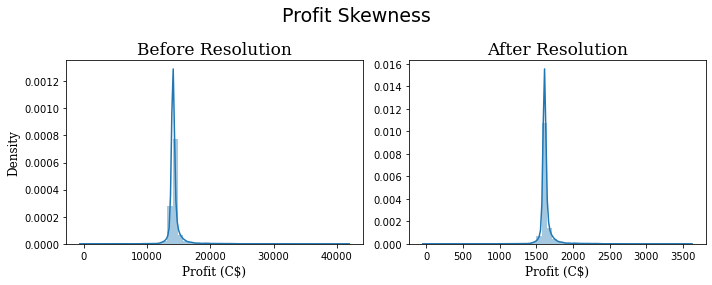

Iinitial skewness :  3.6465875349923906
Resolved skewness :  1.644747453772877


In [61]:
#Making the profit values > 0 positive by adding the (Min Value + 1 )
mn=sales_od['profit'].min()
pos_profit=sales['profit']+(-mn)+1

#Subplot 
plt.figure(figsize=(10,4))
plt.suptitle('Profit Skewness', size=19)
plt.subplot(1,2,1)
_=sns.distplot(pos_profit)
auto_label(x='Profit (C$)', y='Density',title='Before Resolution',st=17, sl=12)

boxcox_p = stats.boxcox(pos_profit)[0]

plt.subplot(1,2,2)
__=sns.distplot(boxcox_p)
auto_label(x='Profit (C$)',title='After Resolution',st=17, sl=12)

plt.tight_layout()
plt.show()

print("Iinitial skewness : ",skew(pos_profit))
print("Resolved skewness : ", skew(boxcox_p))

### Unit_Price

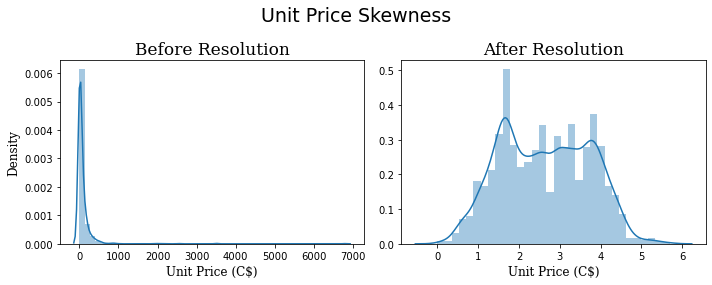

Iinitial skewness :  14.125270090319862
Resolved skewness :  0.05086082140915801


In [62]:
plt.figure(figsize=(10,4))
plt.suptitle('Unit Price Skewness', size=19)
plt.subplot(1,2,1)
_=sns.distplot(sales['unit_price'])
auto_label(x='Unit Price (C$)', y='Density',title='Before Resolution',st=17, sl=12)

boxcox_up = stats.boxcox(sales_od['unit_price'])[0]

plt.subplot(1,2,2)
__=sns.distplot(boxcox_up)
auto_label(x='Unit Price (C$)',title='After Resolution',st=17, sl=12)

plt.tight_layout()
plt.show()

print("Iinitial skewness : ",skew(sales['unit_price']))
print("Resolved skewness : ", skew(boxcox_up))

### Discounts

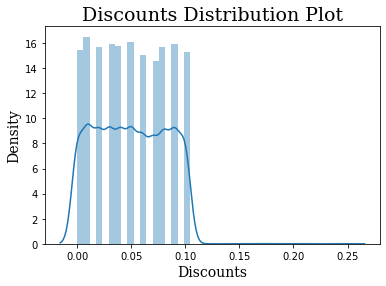

Skewness :  0.07390376085765782


In [63]:
sns.distplot(sales['discounts'])

auto_label('Discounts', 'Density', 'Discounts Distribution Plot', st=19, sl=14)
plt.show()
print("Skewness : ",skew(sales_od['discounts']))

The Distribution is fairly symmetrical

### Sales

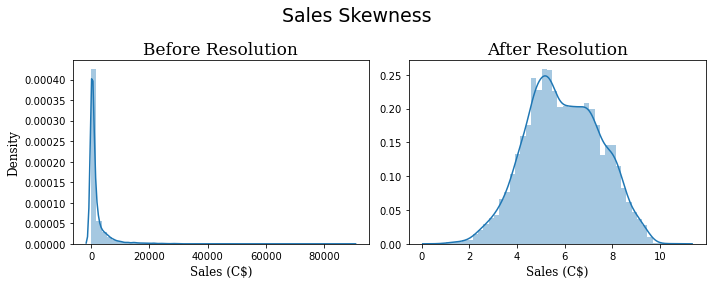

Iinitial skewness :  5.386020250490863
Resolved skewness :  0.0037589810609411703


In [64]:
plt.figure(figsize=(10,4))
plt.suptitle('Sales Skewness', size=19)
plt.subplot(1,2,1)
_=sns.distplot(sales['sales'])
auto_label(x='Sales (C$)', y='Density',title='Before Resolution',st=17, sl=12)

boxcox_sl = stats.boxcox(sales_od['sales'])[0]

plt.subplot(1,2,2)
__=sns.distplot(boxcox_sl)
auto_label(x='Sales (C$)',title='After Resolution',st=17, sl=12)

plt.tight_layout()
plt.show()

print("Iinitial skewness : ",skew(sales['sales']))
print("Resolved skewness : ", skew(boxcox_sl))

### Shipping Cost

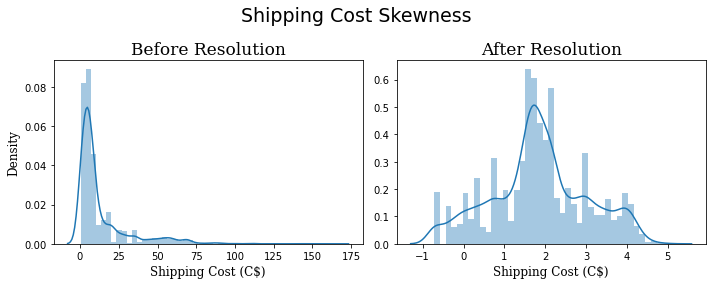

Iinitial skewness :  2.553344727719059
Resolved skewness :  0.0009546187722705647


In [65]:
plt.figure(figsize=(10,4))
plt.suptitle('Shipping Cost Skewness', size=19)
plt.subplot(1,2,1)
_=sns.distplot(sales['shipping_cost'])
auto_label(x='Shipping Cost (C$)', y='Density',title='Before Resolution',st=17, sl=12)

boxcox_sc = stats.boxcox(sales_od['shipping_cost'])[0]

plt.subplot(1,2,2)
__=sns.distplot(boxcox_sc)
auto_label(x='Shipping Cost (C$)',title='After Resolution',st=17, sl=12)

plt.tight_layout()
plt.show()

print("Iinitial skewness : ",skew(sales['shipping_cost']))
print("Resolved skewness : ", skew(boxcox_sc))

### Product Base Margin

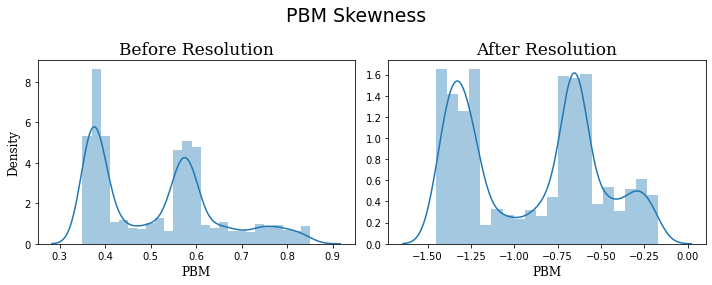

Iinitial skewness :  nan
Resolved skewness :  0.0009546187722705647
Iinitial Skewness is 'nan' as it a bimodal distribution with two peaks


In [66]:
plt.figure(figsize=(10,4))
plt.suptitle('PBM Skewness', size=19)
plt.subplot(1,2,1)
_=sns.distplot(sales['product_base_margin'])
auto_label(x='PBM', y='Density',title='Before Resolution',st=17, sl=12)

boxcox_pbm = stats.boxcox(sales_od['product_base_margin'])[0]

plt.subplot(1,2,2)
__=sns.distplot(boxcox_pbm)
auto_label(x='PBM',title='After Resolution',st=17, sl=12)

plt.tight_layout()
plt.show()

print("Iinitial skewness : ",skew(sales['product_base_margin']))
print("Resolved skewness : ", skew(boxcox_sc))

print("Iinitial Skewness is 'nan' as it a bimodal distribution with two peaks")

## Unusual Pattern Detected

In [67]:
# Generally (sales = Unit price * Quantity) or (sales = Discounted Price * Quantity)
unusual = sales_od[['unit_price', 'order_quantity', 'discounts', 'shipping_cost','sales']].copy()


In [68]:
unusual['original_price'] = unusual['unit_price'] * unusual['order_quantity']
unusual['discounted_price']= unusual['original_price'] * (1-unusual['discounts'])
unusual['discounted_price_with_sc'] = unusual['discounted_price']+unusual['shipping_cost']
unusual.head(10)

,unit_price,order_quantity,discounts,shipping_cost,sales,original_price,discounted_price,discounted_price_with_sc
3142,95.99,9,0.08,35.00,872.48,863.91,794.7972,829.7972
4376,5.98,32,0.10,4.69,180.36,191.36,172.2240,176.9140
4857,3.58,42,0.01,5.47,161.77,150.36,148.8564,154.3264
4858,41.32,11,0.09,8.66,447.09,454.52,413.6132,422.2732
7083,6.68,43,0.01,6.92,294.13,287.24,284.3676,291.2876
4859,145.45,29,0.02,17.85,4192.88,4218.05,4133.6890,4151.5390
5324,204.10,6,0.09,13.99,1193.10,1224.60,1114.3860,1128.3760
5280,63.98,18,0.05,19.99,1163.75,1151.64,1094.0580,1114.0480
4983,5.18,11,0.06,2.04,62.84,56.98,53.5612,55.6012
31,40.99,21,0.06,19.99,845.32,860.79,809.1426,829.1326


There is some issue with sales price

In [69]:
end = datetime.now()
print("Run Time : ", (end-start))

Run Time :  0:00:09.027793


### One-Hot Encoding (Explanation)

It can be done to convert categorical features into numerical features like in our case 'product_category': ['Furniture','Office Supplies','Technology']. This process can add three columns in our dataset which is irrelevant for EDA Analysis. One Hot Encoding is reliable technique for performing calssification, clustering ML Algorithms.

## Summary

## References:

1.https://stackoverflow.com/questions/62201732/how-to-scatter-plot-or-heatmap-spearmans-correlation-in-python
2.https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot
3.https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
4.https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
5.https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python
6.https://www.statista.com/statistics/289741/canada-retail-e-commerce-sales/